In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/yaojack/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('./data/advanced/weather.csv')
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [3]:
days = df[df['MONTH'].isin([1,7]) & (df['DAY'] == 1)].drop(columns=['DAY'])
days = days.pivot(columns='MONTH', index='TIME')
days.head()

TEMP       PRESSURE       
MONTH    1     7        1      7
TIME                            
1      6.8  16.3    10207  10100
2      5.8  16.5    10214  10099
3      5.7  16.3    10220  10098
4      6.0  16.5    10225  10096
5      4.5  16.7    10230  10098

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

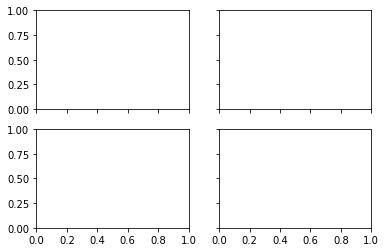

In [4]:
fig, ax = plt.subplots(2,2,sharex='col', sharey='row')
ax
# ax = days.plot(subplots=True, layout=(2,2), sharey=True)

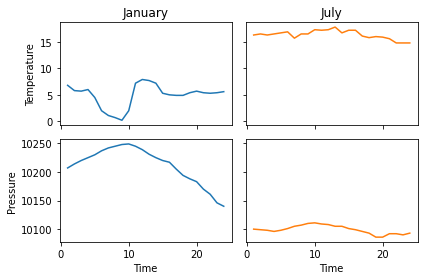

In [25]:

fig, ax = plt.subplots(2,2,sharex='col', sharey='row')
days['TEMP'].plot(subplots=True, ax=ax[0],legend=False)
days['PRESSURE'].plot(subplots=True, ax=ax[1],legend=False);
ax[0][0].set_ylabel('Temperature')
ax[0][0].set_title('January')
ax[0][1].set_title('July')
ax[1][0].set_ylabel('Pressure')
ax[1][0].set_xlabel('Time')
ax[1][1].set_xlabel('Time')
fig.tight_layout()

# days['TEMP'].plot(ax=ax[0])

In [15]:
jax[0]

array([<Axes: xlabel='TIME'>, <Axes: xlabel='TIME'>], dtype=object)

In [7]:
%pip install --upgrade matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Requirement already up-to-date: matplotlib in /Users/yaojack/anaconda3/envs/ml/lib/python3.8/site-packages (3.7.5)
Note: you may need to restart the kernel to use updated packages.


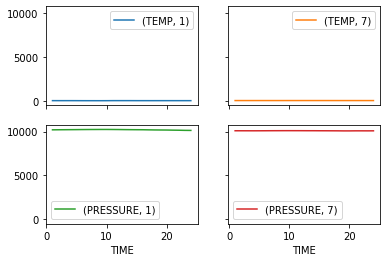

In [16]:
ax = days.plot(subplots=True, layout=(2,2), sharey=True)
# days.plot(sharey=True, layout=(2,2))


In [9]:
import sys
sys.executable

'/Users/yaojack/anaconda3/envs/ml/bin/python'

In [10]:
import matplotlib

In [11]:
matplotlib._version.version

'3.7.5'

In [26]:
df = pd.read_csv('./data/advanced/sales.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     50 non-null     datetime64[ns]
 1   Amount   50 non-null     int64         
 2   Product  50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [27]:
df.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [28]:
df['Date'].dt.month

0      1
1      2
2      3
3      3
4      4
5      4
6      5
7      5
8      5
9      6
10     6
11     6
12     6
13     7
14     7
15    10
16     7
17     8
18     8
19    11
20    11
21     8
22     8
23    10
24    12
25    12
26     1
27     1
28     1
29     2
30     2
31     4
32     4
33     4
34     4
35     4
36     5
37     5
38     5
39     6
40     7
41    10
42     7
43     8
44     9
45    10
46    10
47    12
48    11
49    12
Name: Date, dtype: int32

In [29]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4


In [34]:
g = df.groupby(['Month','Product'])['Amount'].sum()

In [35]:
g

Month  Product
1      a           7260
       b           9258
       c           1740
2      a           6534
       c           5000
3      a           7260
       c           2117
4      a          11616
       b          13221
       c           5440
5      a           7119
       c           2990
6      a          11071
       c           7176
7      a           4200
       b          15973
       c           2901
8      a          10342
       c           6662
9      c            660
10     a           2100
       b          10711
       c          14520
11     a           7260
       c           3710
12     a          11616
       b          14800
Name: Amount, dtype: int64

In [38]:
g = g.unstack()
revenue = g.cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,NaN,6740.0
3,21054.0,NaN,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,NaN,17287.0
6,50860.0,NaN,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,NaN,34026.0
9,NaN,NaN,34686.0


In [39]:
g

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


In [40]:
g.sum()

Product
a    86378.0
b    63963.0
c    52916.0
dtype: float64

In [41]:
g == revenue

Product,a,b,c
Month,,,
1,True,True,True
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [43]:
revenue = g.fillna(0).cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


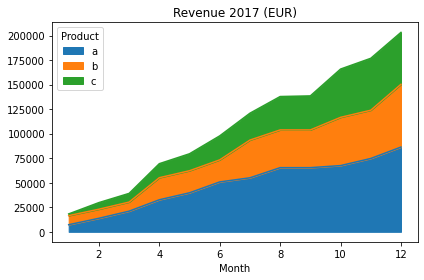

In [45]:
fig, ax = plt.subplots()
revenue.plot.area(title='Revenue 2017 (EUR)', ax=ax)
fig.tight_layout()

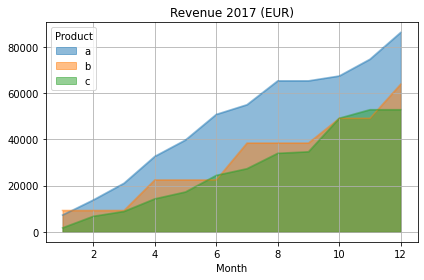

In [47]:
fig, ax = plt.subplots()
revenue.plot.area(title='Revenue 2017 (EUR)', ax=ax, stacked=False, grid=True)
fig.tight_layout()

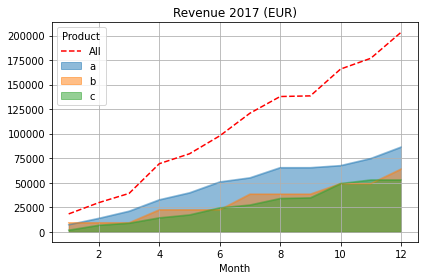

In [51]:
fig, ax = plt.subplots()
total_revenue = df.groupby('Month')['Amount'].sum().cumsum()
total_revenue.plot(ax=ax, style='r--', legend=True, label="All")
revenue.plot.area(title='Revenue 2017 (EUR)', ax=ax, stacked=False, grid=True)
fig.tight_layout()